
# 1. Introduction

 AN IMAGE OF THE DIAGRAM WILL GO HERE

In this section I will be discussing how we take in user inputted images and go through a series of conditions to output a prediciton of what the image represented which is a number from 0 - 9.

The script used Python and Keras. Keras is used to create a model which we can use to predict what number is in the image much faster once it is generated by the mnist_Setup.py.

https://stackoverflow.com/questions/53014306/error-15-initializing-libiomp5-dylib-but-found-libiomp5-dylib-already-initial

This is will differ ever so slighly to the model used in the actual web app. This is because there are multiple ways of getting the same answer and I will point out where these differences occur and why the occur

## Here I use the data in csv format. This is so that I can explore the dataset better and as a result explain the model better.

### Imports

In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib.pyplot as plt
import seaborn as sns

# Basic ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Deep Learning libraries
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D, Dropout, Flatten, Dense, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, LearningRateScheduler

%matplotlib inline
plt.style.use('ggplot')
sns.set_style('whitegrid')

### Read in our data

In [14]:
train = pd.read_csv("/Users/rossheaney/Desktop/Workspace/FourthYear/ET/project/G00345608/MNIST_Datset_Files/mnist_train.csv")
test = pd.read_csv("/Users/rossheaney/Desktop/Workspace/FourthYear/ET/project/G00345608/MNIST_Datset_Files/mnist_test.csv")

display(train.info())

display(test.info())

display(train.head(n = 2))
display(test.head(n = 2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 59.9 MB


None

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### The dataset is clean so we don't have to do any cleaning of the dataset which is good for us!

In [16]:
# Split the train dataset into features and labels

features_train = train.iloc[:, 1:]
labels_train = train.iloc[:, 0:1].values

(28, 28)
The below Image should be a  [2]


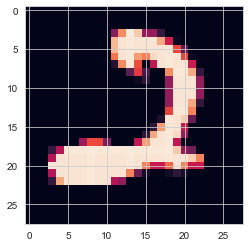

In [17]:
# Normalize the data and reshape it

features_train = features_train / 255.0
test = test / 255.0

# features_train.iloc[1, :].values.shape -> 1D array with shape (784,)

sampleImageIndex = 1010

sampleImagePixelMap = features_train.iloc[sampleImageIndex, :].values.reshape(28, 28)
print(sampleImagePixelMap.shape)

print("The below Image should be a ", labels_train[sampleImageIndex])
g = plt.imshow(sampleImagePixelMap)

In [18]:
# Reshaping Contd.

features_train = features_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

print(features_train.shape)
print(test.shape)


ValueError: cannot reshape array of size 7850000 into shape (28,28,1)